In [15]:
import pandas as pd
import numpy as np
import pickle

import itertools
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

import matplotlib
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# # Sample data
# texts = ["text1", "text2", "text3", "text4", "text5"]
# audio_features = np.random.rand(5, 10)  # Example audio features
# labels = ["frustration", "angry", "others", "frustration", "angry"]


In [28]:
df = pd.read_csv('../data/preprocessing/audio_features_wiz_mcc_mel.csv')
# print(df.count())
# df.head()
# set(df.label)
print(df.columns)
print(df.groupby('label').count())

Index(['wav_file', 'label', 'sig_mean', 'sig_std', 'rmse_mean', 'rmse_std',
       'silence', 'harmonic', 'auto_corr_max', 'auto_corr_std', 'mfcc_1_mean',
       'mfcc_2_mean', 'mfcc_3_mean', 'mfcc_4_mean', 'mfcc_5_mean',
       'mfcc_6_mean', 'mfcc_7_mean', 'mfcc_8_mean', 'mfcc_9_mean',
       'mfcc_10_mean', 'mfcc_11_mean', 'mfcc_12_mean', 'mfcc_13_mean',
       'mfcc_1_std', 'mfcc_2_std', 'mfcc_3_std', 'mfcc_4_std', 'mfcc_5_std',
       'mfcc_6_std', 'mfcc_7_std', 'mfcc_8_std', 'mfcc_9_std', 'mfcc_10_std',
       'mfcc_11_std', 'mfcc_12_std', 'mfcc_13_std', 'mel_mean', 'mel_std'],
      dtype='object')
       wav_file  sig_mean  sig_std  rmse_mean  rmse_std  silence  harmonic  \
label                                                                        
0          2202      2202     2202       2202      2202     2202      2202   
1          1190      1190     1190       1190      1190     1190      1190   
2          2082      2082     2082       2082      2082     2082      2082 

140372


Text(0.5, 1.0, 'Explained variance ratio by principal components')

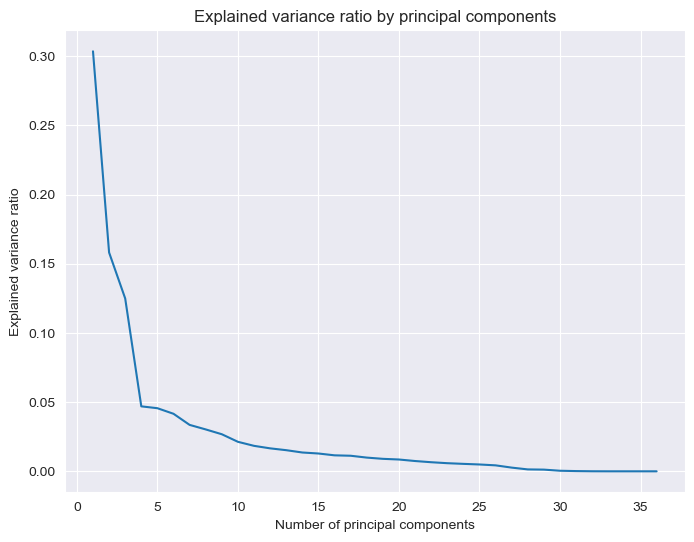

In [57]:
df = pd.read_csv('../data/preprocessing/audio_features_wiz_mcc_mel.csv')
df['label'] = df['label'].astype('category')
df = df[df.label == 4]
print(df.size)
# # 2. Dimensionality Reduction (Optional)
# pca = PCA(n_components=2)
# X_reduced = pca.fit_transform(df.drop(['wav_file', 'label'], axis=1))
features = df.drop(['wav_file', 'label'], axis=1)
scaler = StandardScaler()
audio_features_scaled = scaler.fit_transform(features)

pca = PCA()
pca.fit(audio_features_scaled)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Number of principal components')
plt.ylabel('Explained variance ratio')
plt.title('Explained variance ratio by principal components')
# 6. Interpretation and Insights
# Analyze the cluster characteristics and identify any new, meaningful emotion categories or subcategories

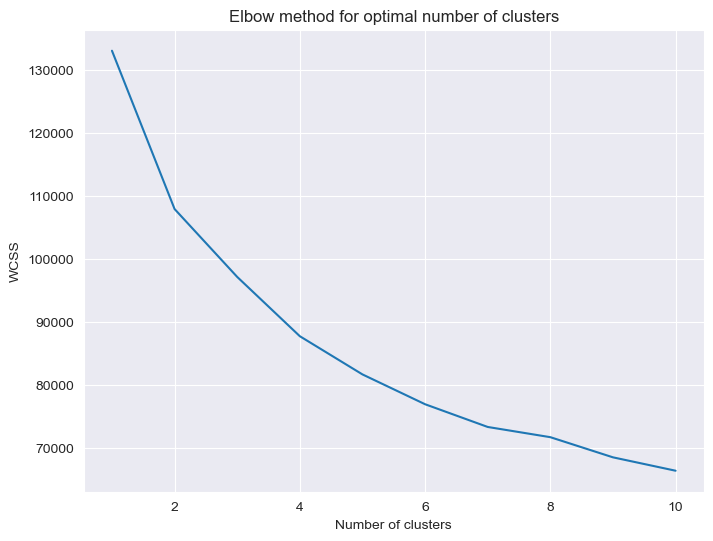

In [58]:
# Determine the number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(audio_features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow method for optimal number of clusters')
plt.show()

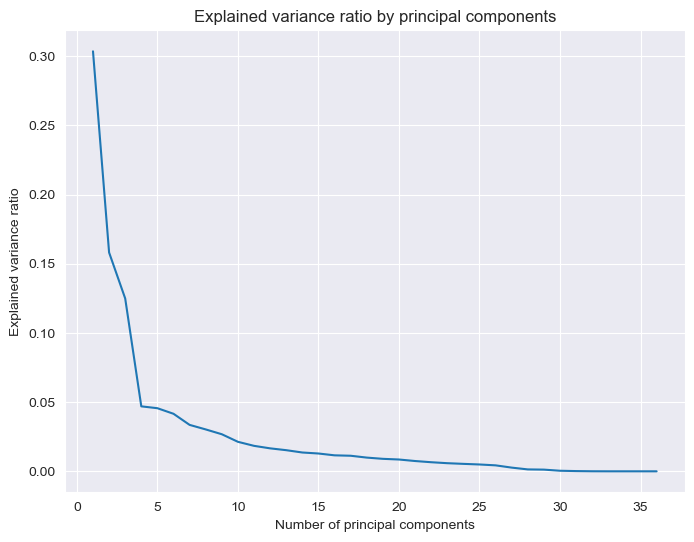

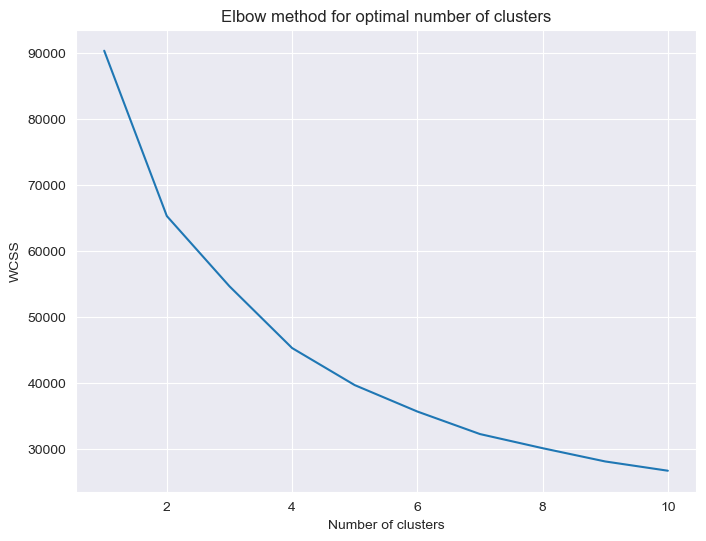

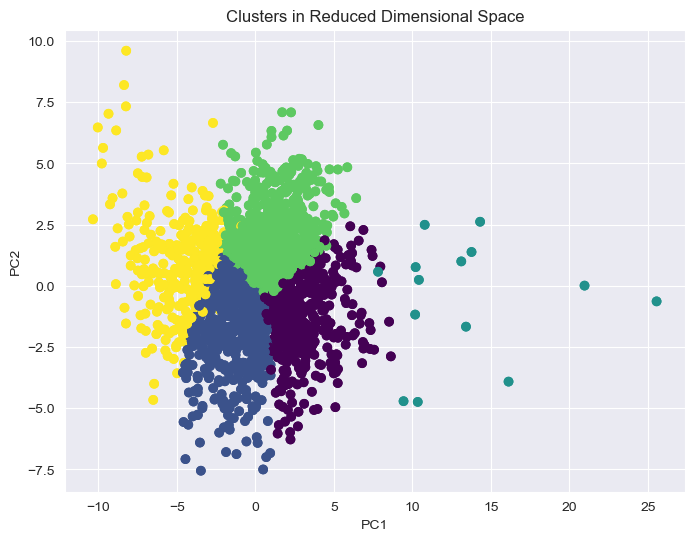

In [59]:
# 1. Dimensionality Reduction using PCA
pca = PCA()
X_pca = pca.fit_transform(audio_features_scaled)

# 2. Determine the number of principal components to retain
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Number of principal components')
plt.ylabel('Explained variance ratio')
plt.title('Explained variance ratio by principal components')
plt.show()

# 3. Clustering using K-Means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_pca[:, :5])
    wcss.append(kmeans.inertia_)

# Determine the optimal number of clusters using the Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow method for optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Perform K-Means clustering with the optimal number of clusters (e.g., 4-5)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_pca[:, :5])

# 4. Cluster Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('Clusters in Reduced Dimensional Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [71]:

# 5. Cluster Characterization
for i in range(n_clusters):
    cluster_data = df.loc[labels == i]
    print(f'Cluster {i}:')
    print('Distribution of labels:', cluster_data['label'].value_counts())
    print(cluster_data.wav_file.iloc[8])
    print('Feature values:')
    print(cluster_data.describe())
    print()

Cluster 0:
Distribution of labels: label
4    828
0      0
1      0
2      0
3      0
5      0
6      0
7      0
8      0
Name: count, dtype: int64
Ses01M_impro01_M002
Feature values:
         sig_mean     sig_std   rmse_mean    rmse_std     silence    harmonic  \
count  828.000000  828.000000  828.000000  828.000000  828.000000  828.000000   
mean     0.016295    0.028819    0.020413    0.020110    0.358424   -0.006840   
std      0.009226    0.015801    0.011506    0.011102    0.085499    0.005367   
min      0.004733    0.008354    0.005949    0.004969    0.115063   -0.088973   
25%      0.009783    0.017542    0.012334    0.012182    0.294408   -0.008142   
50%      0.013456    0.023391    0.016924    0.016586    0.350203   -0.006384   
75%      0.020064    0.035756    0.025115    0.024318    0.410876   -0.004787   
max      0.053867    0.093418    0.066718    0.066986    0.615527    0.004585   

       auto_corr_max  auto_corr_std  mfcc_1_mean  mfcc_2_mean  ...  \
count     828.00

In [67]:
# 5. Cluster Characterization
from scipy.stats import ttest_ind

for i in range(n_clusters):
    cluster_data = df.loc[labels == i]
    print(f'Cluster {i}:')
    print('Distribution of labels:', cluster_data['label'].value_counts())
    print('First wav file in cluster:', cluster_data.wav_file.iloc[0])
    print('Feature values:')
    
    # Filter out non-numeric columns
    numeric_cols = cluster_data.select_dtypes(include=['number']).columns
    cluster_stats = cluster_data[numeric_cols].describe()
    print(cluster_stats)
    
    # Perform t-tests to check for significant differences in feature values
    for j in range(i+1, n_clusters):
        other_cluster = df.loc[labels == j]
        for feature in numeric_cols:
            t_stat, p_value = ttest_ind(cluster_data[feature], other_cluster[feature])
            if p_value < 0.05:
                print(f"Significant difference in '{feature}' between Cluster {i} and Cluster {j}, p-value: {p_value:.3f}")
    print()

Cluster 0:
Distribution of labels: label
4    828
0      0
1      0
2      0
3      0
5      0
6      0
7      0
8      0
Name: count, dtype: int64
First wav file in cluster: Ses01M_impro01_F004
Feature values:
         sig_mean     sig_std   rmse_mean    rmse_std     silence    harmonic  \
count  828.000000  828.000000  828.000000  828.000000  828.000000  828.000000   
mean     0.016295    0.028819    0.020413    0.020110    0.358424   -0.006840   
std      0.009226    0.015801    0.011506    0.011102    0.085499    0.005367   
min      0.004733    0.008354    0.005949    0.004969    0.115063   -0.088973   
25%      0.009783    0.017542    0.012334    0.012182    0.294408   -0.008142   
50%      0.013456    0.023391    0.016924    0.016586    0.350203   -0.006384   
75%      0.020064    0.035756    0.025115    0.024318    0.410876   -0.004787   
max      0.053867    0.093418    0.066718    0.066986    0.615527    0.004585   

       auto_corr_max  auto_corr_std  mfcc_1_mean  mfcc_2_me

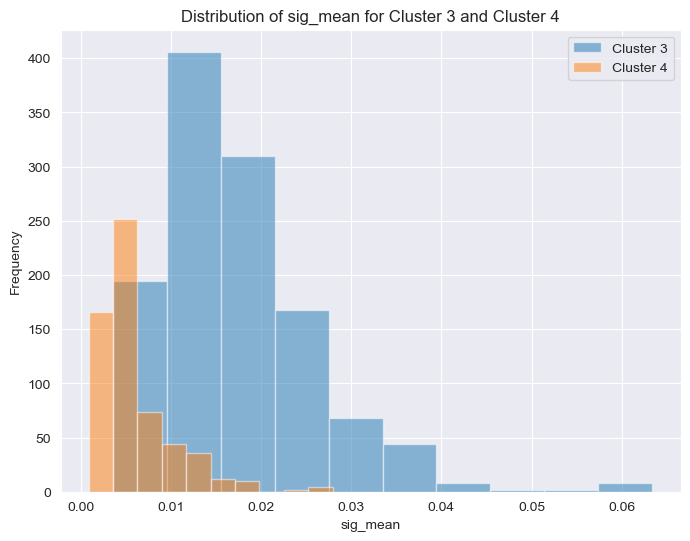

In [73]:
import matplotlib.pyplot as plt

cluster_3_sig_mean = df.loc[labels == 3, 'sig_std']
cluster_4_sig_mean = df.loc[labels == 4, 'sig_std']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the distribution of 'sig_mean' for each cluster
ax.hist(cluster_3_sig_mean, alpha=0.5, label='Cluster 3')
ax.hist(cluster_4_sig_mean, alpha=0.5, label='Cluster 4')

# Add labels and title
ax.set_xlabel('sig_mean')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of sig_mean for Cluster 3 and Cluster 4')
ax.legend()

# Show the plot
plt.show()

In [6]:
# df = df[df['label'].isin([0, 1, 2, 3, 4, 5, 6, 7])]
df = df[df['label'].isin([0])]

# print(df.shape)
# display(df.head())
#'ang':0
#'fru':1
#"other":3

# change 7 to 2
print(df.groupby('label').count())
# df['label'] = df['label'].map({0: 0, 1: 2, 2: 2, 3: 2, 4: 1, 5: 2, 6: 2, 7: 2,8:2})

display(df.head())


       wav_file  sig_mean  sig_std  rmse_mean  rmse_std  silence  harmonic  \
label                                                                        
0          2202      2202     2202       2202      2202     2202      2202   

       auto_corr_max  auto_corr_std  mfcc_1_mean  ...  mfcc_6_std  mfcc_7_std  \
label                                             ...                           
0               2202           2202         2202  ...        2202        2202   

       mfcc_8_std  mfcc_9_std  mfcc_10_std  mfcc_11_std  mfcc_12_std  \
label                                                                  
0            2202        2202         2202         2202         2202   

       mfcc_13_std  mel_mean  mel_std  
label                                  
0             2202      2202     2202  

[1 rows x 37 columns]


,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,...,mfcc_6_std,mfcc_7_std,mfcc_8_std,mfcc_9_std,mfcc_10_std,mfcc_11_std,mfcc_12_std,mfcc_13_std,mel_mean,mel_std
0,Ses01M_impro01_F000,0,0.031214,0.084176,0.038141,0.074893,0.678082,-0.332767,0.116155,0.671631,...,11.312883,9.868013,-0.920634,8.691163,-4.540962,8.865949,3.750051,7.888231,-62.710217,16.926535
1,Ses01M_impro01_F000,0,0.031214,0.084176,0.038141,0.074893,0.678082,-0.332767,0.116155,0.671631,...,11.312883,9.868013,-0.920634,8.691163,-4.540962,8.865949,3.750051,7.888231,-62.710217,16.926535
2,Ses01M_impro01_F001,0,0.028566,0.046963,0.035969,0.030096,0.288136,-0.000076,0.111075,0.435513,...,-3.892180,11.055390,-1.033096,7.408737,-5.517409,9.276402,2.458138,10.109358,-56.395930,18.930115
3,Ses01M_impro01_F001,0,0.028566,0.046963,0.035969,0.030096,0.288136,-0.000076,0.111075,0.435513,...,-3.892180,11.055390,-1.033096,7.408737,-5.517409,9.276402,2.458138,10.109358,-56.395930,18.930115
14,Ses01M_impro01_F007,0,0.038313,0.065586,0.047453,0.045202,0.383051,-0.002994,0.198594,1.252726,...,2.232868,10.742470,-2.091716,12.305913,-7.708544,10.212510,-2.182236,11.214724,-57.961594,19.012335


In [4]:
pca = PCA(n_components=2)

In [7]:
# Standardize audio features

import pandas as pd

if any(df['label'].value_counts() < 25):
    print("Warning: Not all groups have enough data for 50 samples each.")
else:
    # Sample 50 data points from each group
    sampled_df = df.groupby('label').apply(lambda x: x.sample(n=75)).reset_index(drop=True)


# df the features
audio_features = sampled_df.drop(['wav_file','label'], axis=1)
print(audio_features.count())
scaler = StandardScaler()
audio_features_scaled = scaler.fit_transform(audio_features)

# Reduce dimensionality using PCA
audio_pca = pca.fit_transform(audio_features_scaled)
# Plot explained variance to determine the number of components
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

/var/folders/2z/9zfdwvxd34j7l53zzdmt6pl80000gn/T/ipykernel_16119/1072119309.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('label').apply(lambda x: x.sample(n=75)).reset_index(drop=True)


sig_mean         75
sig_std          75
rmse_mean        75
rmse_std         75
silence          75
harmonic         75
auto_corr_max    75
auto_corr_std    75
mfcc_1_mean      75
mfcc_2_mean      75
mfcc_3_mean      75
mfcc_4_mean      75
mfcc_5_mean      75
mfcc_6_mean      75
mfcc_7_mean      75
mfcc_8_mean      75
mfcc_9_mean      75
mfcc_10_mean     75
mfcc_11_mean     75
mfcc_12_mean     75
mfcc_13_mean     75
mfcc_1_std       75
mfcc_2_std       75
mfcc_3_std       75
mfcc_4_std       75
mfcc_5_std       75
mfcc_6_std       75
mfcc_7_std       75
mfcc_8_std       75
mfcc_9_std       75
mfcc_10_std      75
mfcc_11_std      75
mfcc_12_std      75
mfcc_13_std      75
mel_mean         75
mel_std          75
dtype: int64


NameError: name 'pca' is not defined

Explained variance by each component: [0.36714822 0.14589092]


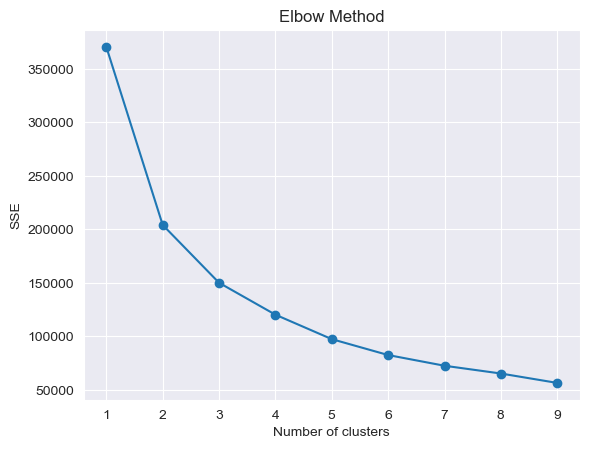

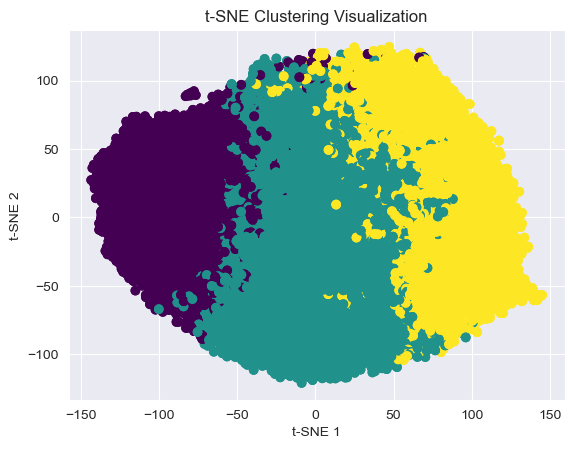

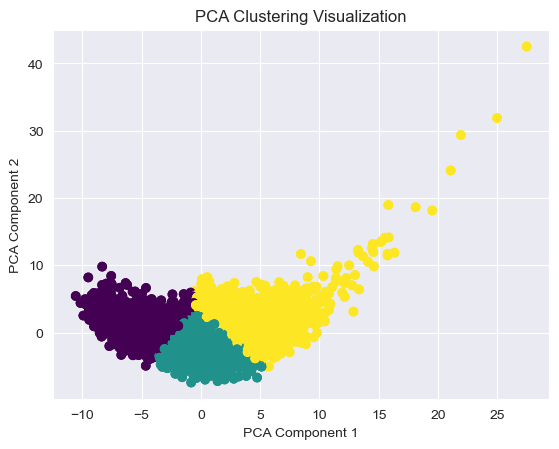

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Remove non-feature columns (e.g., 'wav_file' and 'label')
features = df.drop(['wav_file', 'label'], axis=1)

# Standardize the features
scaler = StandardScaler()
audio_features_scaled = scaler.fit_transform(features)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
audio_pca = pca.fit_transform(audio_features_scaled)

# Plot explained variance to determine the number of components
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(audio_pca)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure()
plt.plot(range(1, 10), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Apply K-means with the optimal number of clusters (assume k=3 based on Elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(audio_pca)

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
audio_tsne = tsne.fit_transform(audio_features_scaled)

plt.figure()
plt.scatter(audio_tsne[:, 0], audio_tsne[:, 1], c=clusters, cmap='viridis')
plt.title('t-SNE Clustering Visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# Optional: Visualize PCA results directly
plt.figure()
plt.scatter(audio_pca[:, 0], audio_pca[:, 1], c=clusters, cmap='viridis')
plt.title('PCA Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [9]:
df_label = df[['label']]
df_label.groupby('label')['label'].count()

label
0    2202
Name: label, dtype: int64

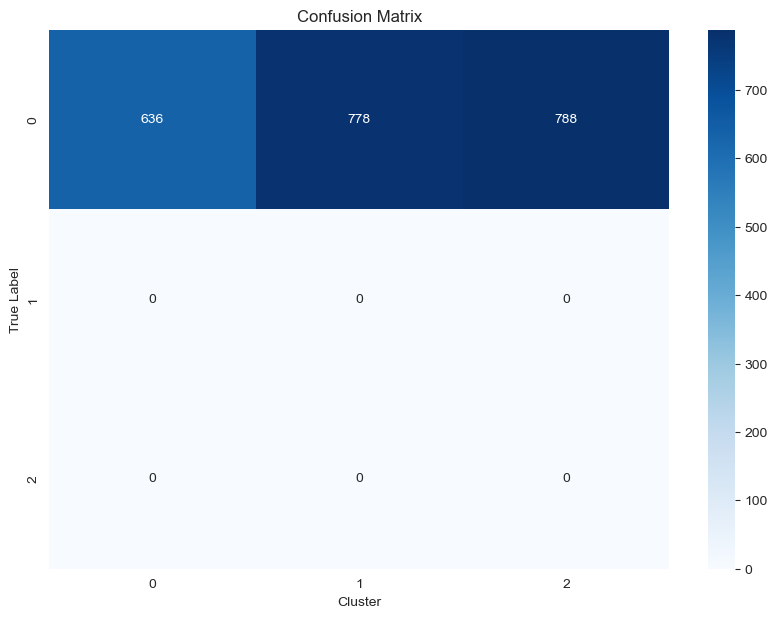

In [10]:
# Create a DataFrame with true labels and cluster assignments
result_df = pd.DataFrame({'true_label': df_label.label, 'cluster': clusters})

# Create a confusion matrix to compare true labels and clusters
conf_matrix = confusion_matrix(result_df['true_label'], result_df['cluster'])
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Cluster')
plt.ylabel('True Label')
plt.show()


In [134]:
len(audio_features_scaled)

7786

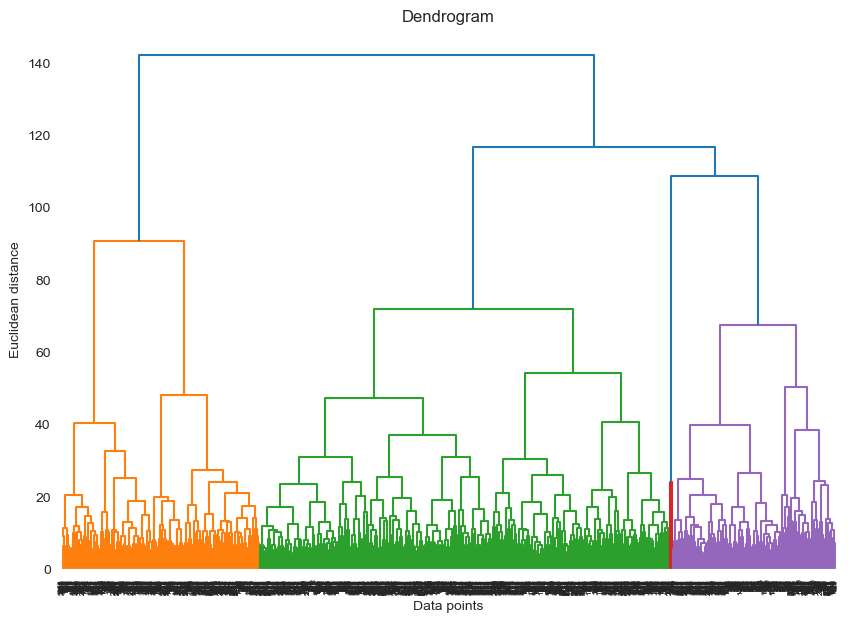

In [11]:
# Generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(audio_features_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()


In [136]:
sampled_df.groupby('label').count()

,wav_file,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,mfcc_1_mean,...,mfcc_6_std,mfcc_7_std,mfcc_8_std,mfcc_9_std,mfcc_10_std,mfcc_11_std,mfcc_12_std,mfcc_13_std,mel_mean,mel_std
label,,,,,,,,,,,,,,,,,,,,,
0,75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75
3,75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75
7,75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75


In [147]:
len(features.columns)

36

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters based on your data
clusters = kmeans.fit_predict(features)
sil_score = silhouette_score(features, clusters)

print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.4063748544632276


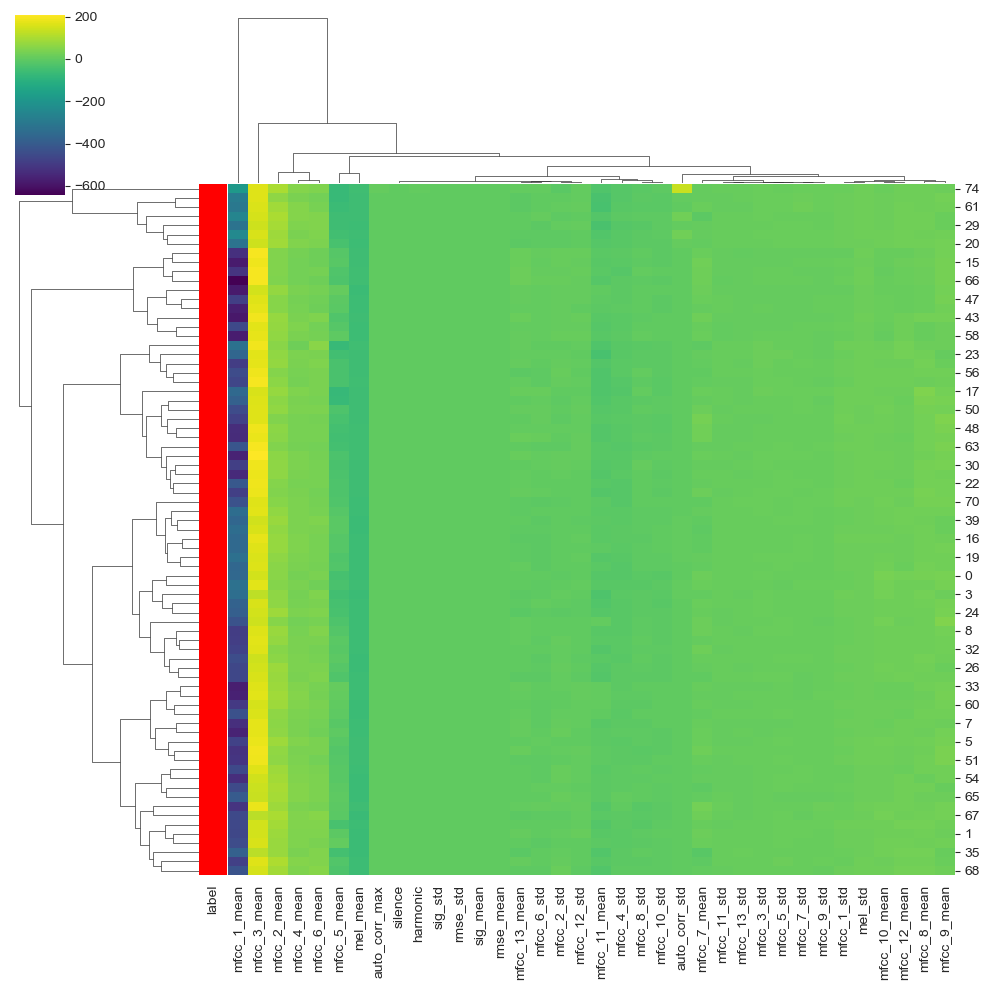

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

# Load your DataFrame (assuming df is your DataFrame and it's already loaded)
# df = pd.read_csv('your_data.csv')  # Uncomment and adjust if you need to load from a file

# Ensure that your DataFrame's index is properly set if using row labels
# df.set_index('wav_file', inplace=True)  # Uncomment if 'wav_file' should be the index

# Select numerical feature columns for the heatmap
# Assuming these are the feature columns from your screenshot
features = sampled_df.drop(columns=['wav_file','label'])

# Generate the linkage matrix for clustering
row_linkage = linkage(scaler.fit_transform(features), method='ward', metric='euclidean')
col_linkage = linkage(scaler.fit_transform(features.T), method='ward', metric='euclidean')  # Transpose to cluster columns

# Create a cluster map with Seaborn
cluster_map = sns.clustermap(features, row_linkage=row_linkage, col_linkage=col_linkage, 
               method="ward", cmap="viridis", figsize=(10, 10),
               row_colors=sampled_df['label'].map({0: 'red', 3: 'blue', 5: 'green'}))

# plt.title('Heatmap with Dendrogram')


cluster_map.savefig('./clustermap.png')

plt.show()

In [73]:
sampled_df

,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,...,mfcc_6_std,mfcc_7_std,mfcc_8_std,mfcc_9_std,mfcc_10_std,mfcc_11_std,mfcc_12_std,mfcc_13_std,mel_mean,mel_std
0,Ses04F_script01_1_F014,0,0.017991,0.029193,0.022129,0.019019,0.322082,-0.007425,0.044663,0.763387,...,-6.201954,12.383402,-3.704868,11.211164,-4.835763,9.600696,-2.145740,9.487737,-60.389187,17.845453
1,Ses03F_script01_2_F000,0,0.002019,0.004323,0.002513,0.003508,0.650407,-0.009874,0.000510,0.004556,...,4.523237,6.343837,0.326911,6.013905,-6.568121,4.921747,1.331006,5.310111,-59.927444,16.435877
2,Ses02M_script01_1_F035,0,0.014364,0.021979,0.017752,0.012852,0.250000,-0.003993,0.028736,0.133011,...,8.057163,11.137552,-8.514348,8.437488,-8.189165,8.983852,8.925959,8.531546,-54.944126,19.224000
3,Ses01M_script02_1_F022,0,0.014057,0.027363,0.017890,0.020700,0.438277,-0.007375,0.026269,0.825093,...,-2.147752,11.464237,0.632890,9.331347,-0.955309,9.356780,3.192441,9.421241,-61.429913,17.059105
4,Ses04M_script01_2_F016,0,0.011336,0.018284,0.013984,0.011741,0.263492,-0.006313,0.017890,0.124652,...,-1.128163,8.907508,-2.167957,9.085644,-1.954860,8.446834,1.461457,9.096313,-59.097267,17.734129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Ses03M_impro07_M006,2,0.002567,0.005000,0.003304,0.003749,0.353909,-0.004571,0.000850,0.006355,...,5.267880,9.233871,-3.205550,8.362297,-4.096484,7.252996,6.414348,7.259898,-54.934616,18.991106
71,Ses03F_impro03_M009,2,0.010665,0.019611,0.013656,0.014051,0.401515,-0.005140,0.015514,0.047807,...,2.024243,7.797061,-0.103828,10.868120,-3.328378,5.708844,0.140686,8.664152,-56.035590,20.205690
72,Ses01F_impro05_M025,2,0.053881,0.079609,0.067418,0.041955,0.134454,-0.008767,0.405002,1.000419,...,-2.033575,11.410130,1.984617,12.609446,-7.328011,11.810455,-7.787521,15.659693,-52.042828,21.075415
73,Ses02F_script03_1_M034,2,0.003660,0.006803,0.004768,0.004849,0.458738,-0.005220,0.001790,0.021705,...,-1.474243,14.898255,-4.446085,9.649418,-5.569416,6.588027,7.270826,7.428722,-55.493660,19.685352


In [65]:
set(df.label)

{0, 1, 2}

In [66]:
len(audio_features_scaled)

75

In [67]:
sampled_df.count()

wav_file         75
label            75
sig_mean         75
sig_std          75
rmse_mean        75
rmse_std         75
silence          75
harmonic         75
auto_corr_max    75
auto_corr_std    75
mfcc_1_mean      75
mfcc_2_mean      75
mfcc_3_mean      75
mfcc_4_mean      75
mfcc_5_mean      75
mfcc_6_mean      75
mfcc_7_mean      75
mfcc_8_mean      75
mfcc_9_mean      75
mfcc_10_mean     75
mfcc_11_mean     75
mfcc_12_mean     75
mfcc_13_mean     75
mfcc_1_std       75
mfcc_2_std       75
mfcc_3_std       75
mfcc_4_std       75
mfcc_5_std       75
mfcc_6_std       75
mfcc_7_std       75
mfcc_8_std       75
mfcc_9_std       75
mfcc_10_std      75
mfcc_11_std      75
mfcc_12_std      75
mfcc_13_std      75
mel_mean         75
mel_std          75
dtype: int64

IndexError: positional indexers are out-of-bounds

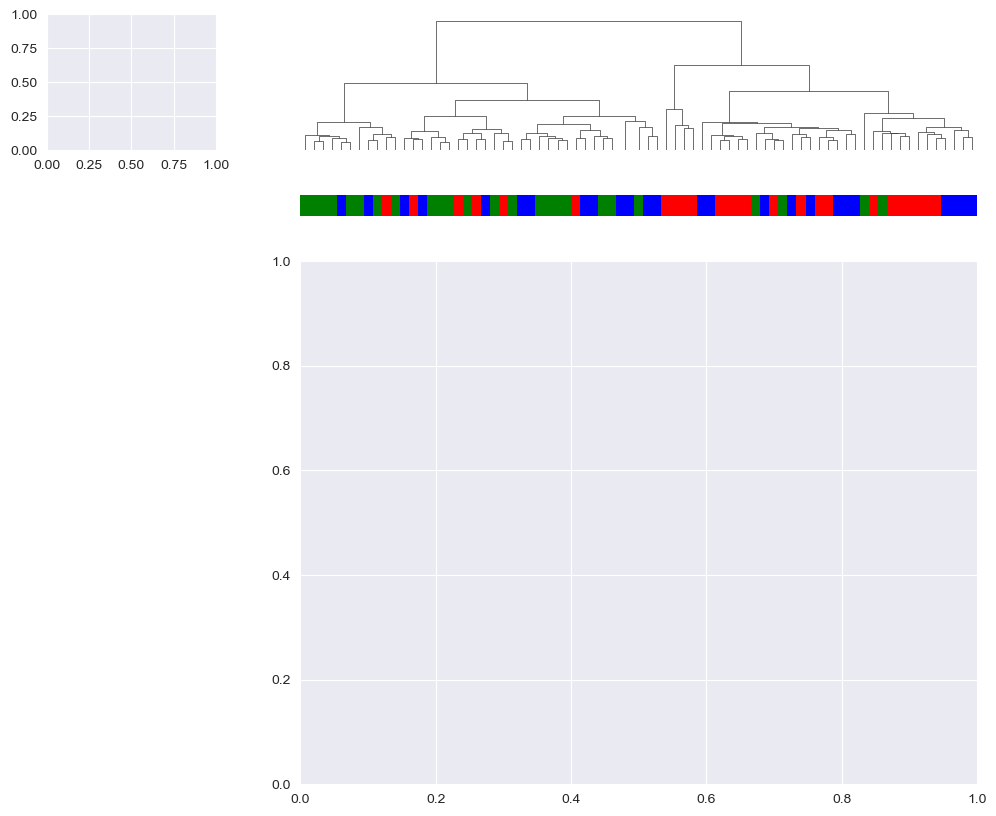

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Assuming 'audio_features_scaled' is your data matrix (like 'mat' in R)
# You should replace 'audio_features_scaled' with your actual data variable

# Generate the linkage matrix
Z = linkage(audio_features_scaled, method='ward', metric='euclidean')
# 
# sample_names = sampled_df.drop(columns=['wav_file','label']).columns.tolist()
# sample_types = [name for name in sample_names]
# annotation_df = pd.DataFrame(data=sample_types, index=sample_names, columns=['Leukemia Type'])


# Here I assume 'sample_names' to be a list of column names from your data
annotation_df = sampled_df[['label']]
# annotation_df = pd.DataFrame(data=leukemia_types, index=sample_names, columns=['Leukemia Type'])


col_colors = sampled_df['label'].map({0: 'red', 1: 'blue',2:'green'}).to_numpy()

# Create a seaborn clustermap
g = sns.clustermap(audio_features_scaled, row_cluster=False, col_linkage=Z,
                col_colors=col_colors,
                   figsize=(12, 10), cmap='viridis')
plt.title('Heatmap with Dendrogram')
plt.show()


In [43]:
from sklearn.cluster import AgglomerativeClustering
# Fit the hierarchical clustering model
n_clusters = 3  # You can choose the number of clusters based on the dendrogram
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = hc.fit_predict(audio_features_scaled)


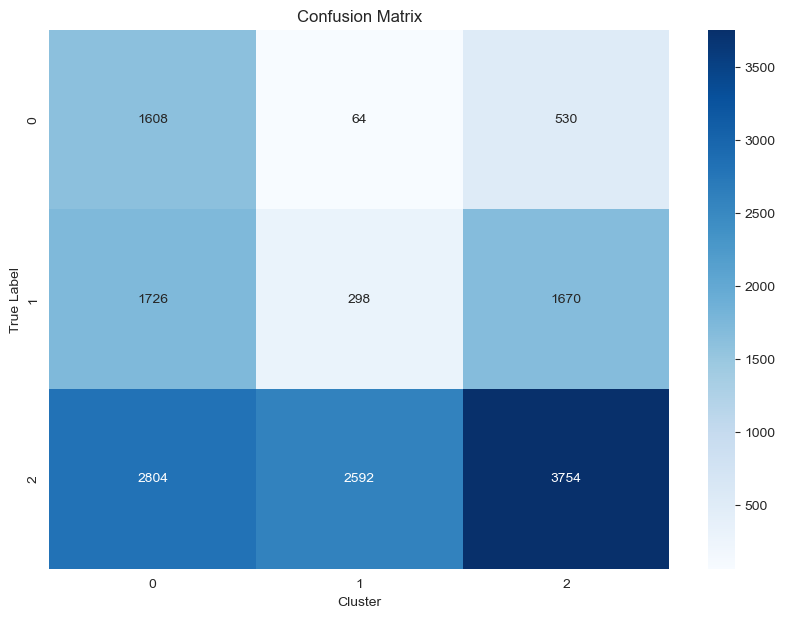

In [44]:
# Create a DataFrame with true labels and cluster assignments
result_df = pd.DataFrame({'true_label': df_label.label, 'cluster': clusters})

# Create a confusion matrix to compare true labels and clusters
conf_matrix = confusion_matrix(result_df['true_label'], result_df['cluster'])
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Cluster')
plt.ylabel('True Label')
plt.show()


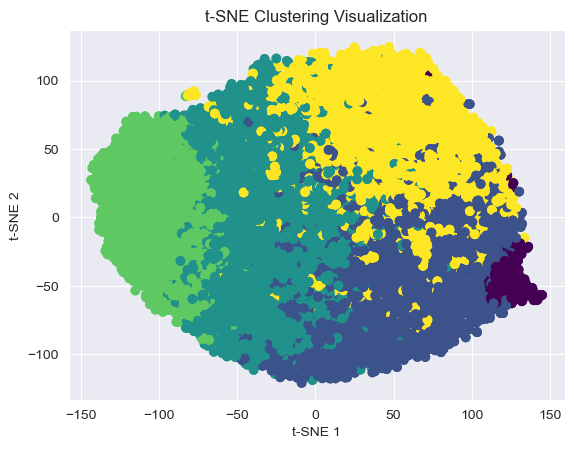

In [36]:
from sklearn.manifold import TSNE

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(audio_features_scaled)

plt.figure()
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=clusters, cmap='viridis')
plt.title('t-SNE Clustering Visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

## Get Text Features

In [93]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english',max_features=100)

_ = pd.concat([x_train_text,x_test_text])

features_text = tfidf.fit_transform(_.transcription).toarray()

x_train_text = features_text[:x_train_text.shape[0]]
x_test_text = features_text[-x_test_text.shape[0]:]

print(features_text.shape, x_train_text.shape, x_test_text.shape)

(3303, 100) (2642, 100) (661, 100)


## Combine Text + Audio Features

In [103]:
x_train_audio

,wav_file,time_gap,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,...,mfcc_9_mean,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std
0,Ses04M_script03_2_F050,0.028447,0,0.268164,0.293871,0.269491,0.322319,0.270156,0.148342,0.069729,...,0.140119,0.523049,0.171112,0.517291,0.595306,0.491680,0.726088,1.000000,0.562238,0.858706
1,Ses03F_impro06_F031,0.126460,2,0.000400,0.000556,0.000417,0.001418,0.000000,0.170789,0.000002,...,0.530982,0.112129,0.694897,0.106491,0.565569,0.071963,0.640587,0.090970,0.655866,0.055763
2,Ses03M_script01_1_M033,0.081602,1,0.003316,0.006388,0.003479,0.012944,0.532838,0.170556,0.000021,...,0.564139,0.327000,0.548439,0.318981,0.624962,0.351233,0.437386,0.288815,0.502360,0.494853
3,Ses01F_script02_1_F003,0.046515,2,0.023515,0.037567,0.025123,0.062328,0.489695,0.171402,0.000563,...,0.594103,0.392541,0.642288,0.266544,0.715849,0.223363,0.678376,0.140065,0.652742,0.165785
4,Ses04F_script01_1_F012,0.038827,0,0.044539,0.052102,0.045357,0.064724,0.297558,0.172620,0.002032,...,0.523666,0.445561,0.512706,0.343878,0.591795,0.487310,0.489094,0.377085,0.335382,0.454351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637,Ses05F_impro01_F005,0.083804,1,0.054855,0.058086,0.056009,0.054954,0.163874,0.170857,0.003099,...,0.331734,0.394156,0.252809,0.400380,0.656638,0.448813,0.596811,0.452886,0.282436,0.550628
2638,Ses03F_script01_2_M016,0.076885,0,0.004586,0.008024,0.004886,0.015134,0.787010,0.171427,0.000035,...,0.609102,0.191410,0.519930,0.332669,0.587577,0.368342,0.447730,0.189394,0.423061,0.191496
2639,Ses03F_script01_2_M014,0.033445,0,0.003455,0.009299,0.003718,0.019780,0.977870,0.170916,0.000021,...,0.764869,0.007948,0.429973,0.126434,0.707736,0.084898,0.603031,0.090202,0.444009,0.029911
2640,Ses05M_impro02_M030,0.161842,2,0.032420,0.038626,0.033552,0.048501,0.351718,0.172226,0.001105,...,0.439205,0.437061,0.402928,0.697251,0.522581,0.397076,0.408196,0.380440,0.365086,0.645841


In [104]:
x_test_audio

,wav_file,time_gap,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,...,mfcc_9_mean,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std
0,Ses04F_impro03_M035,0.092262,2,0.030120,0.036587,0.031269,0.046915,0.262056,0.172144,0.000973,...,0.391610,0.325943,0.402018,0.464784,0.514925,0.365586,0.587075,0.374761,0.478474,0.541563
1,Ses01F_impro04_F000,0.139719,2,0.035530,0.051433,0.036997,0.080641,0.559426,0.171663,0.001279,...,0.472424,0.447284,0.282238,0.505367,0.769406,0.285347,0.774856,0.275793,0.472902,0.318118
2,Ses01M_script01_3_F016,0.228540,2,0.099749,0.139641,0.103448,0.211712,0.497346,0.171354,0.009285,...,0.483176,0.483754,0.265093,0.349398,0.704356,0.488677,0.653871,0.428375,0.208976,0.433002
3,Ses04F_impro08_F001,0.212970,2,0.035878,0.043355,0.036531,0.057260,0.244340,0.171575,0.001339,...,0.342314,0.419162,0.312258,0.513178,0.605177,0.445975,0.523308,0.389970,0.419086,0.623512
4,Ses03M_script03_2_M014,0.161104,0,0.004573,0.006702,0.004737,0.011651,0.405152,0.171630,0.000037,...,0.607089,0.326870,0.460159,0.343421,0.600708,0.368172,0.506782,0.282661,0.450529,0.341184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,Ses04M_script01_1_M041,0.081878,2,0.011828,0.016579,0.012167,0.026366,0.715675,0.171298,0.000166,...,0.596054,0.355117,0.439625,0.340289,0.618491,0.486255,0.587917,0.370515,0.464328,0.206153
657,Ses02M_script03_2_M027,0.117522,0,0.036173,0.045109,0.037743,0.060203,0.340014,0.171952,0.001383,...,0.601408,0.562922,0.320180,0.489164,0.396948,0.538881,0.580315,0.439019,0.476440,0.417738
658,Ses03M_impro05a_M013,0.166455,0,0.061802,0.080155,0.064990,0.110872,0.459263,0.171742,0.003760,...,0.496867,0.569441,0.267534,0.588835,0.356942,0.493335,0.537901,0.435628,0.192336,0.515984
659,Ses01M_script02_2_F000,0.060600,2,0.014989,0.023455,0.015763,0.039233,0.424998,0.171644,0.000255,...,0.498193,0.171770,0.539949,0.324858,0.673647,0.303025,0.579536,0.069738,0.583748,0.321601


In [105]:
x_train_audio_selected = x_train_audio[x_train_audio.columns.difference(['wav_file', 'label'])]
x_train_audio_array = np.array(x_train_audio_selected)
x_test_audio_selected = x_test_audio[x_test_audio.columns.difference(['wav_file', 'label'])]
x_test_audio_array = np.array(x_test_audio_selected)

combined_x_train = np.concatenate((x_train_audio_array, x_train_text), axis=1)
# combined_x_train = x_train_audio_array

combined_x_test = np.concatenate((x_test_audio_array, x_test_text), axis=1)
# combined_x_test = x_test_audio_array

print(combined_x_train.shape, combined_x_test.shape)

combined_features_dict = {}

combined_features_dict['x_train'] = combined_x_train
combined_features_dict['x_test'] = combined_x_test
combined_features_dict['y_train'] = np.array(y_train)
combined_features_dict['y_test'] = np.array(y_test)

with open('../data/model_file/combined_features.pkl', 'wb') as f:
    pickle.dump(combined_features_dict, f)

(2642, 135) (661, 135)


In [106]:
combined_x_train

array([[6.97289462e-02, 1.00618681e-02, 1.48342158e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.66048515e-06, 1.87790452e-06, 1.70789285e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.14671936e-05, 1.14881102e-05, 1.70555816e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.08188634e-05, 8.56623666e-06, 1.70915933e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.10513179e-03, 5.98541128e-04, 1.72225828e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.87346808e-04, 9.12961649e-05, 1.71749501e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

Test Set Accuracy =  0.548
Test Set F-score =  0.547
Test Set Precision =  0.552
Test Set Recall =  0.545
Confusion matrix, without normalization
[[144  70  21]
 [ 60 100  50]
 [ 33  65 118]]


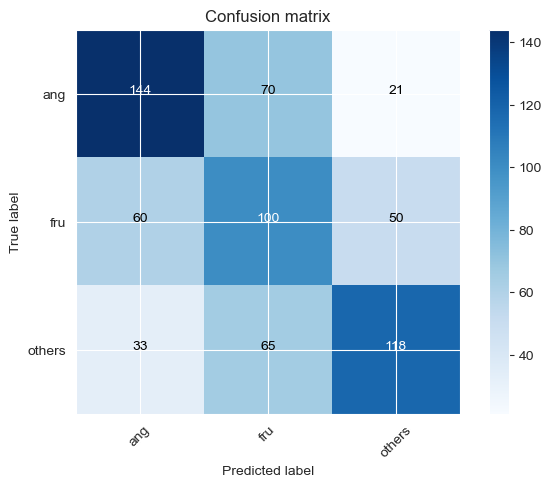

In [107]:
rf_classifier = RandomForestClassifier(n_estimators=600, min_samples_split=25)
rf_classifier.fit(combined_x_train, y_train)

# Predict
pred_probs = rf_classifier.predict_proba(combined_x_test)

# Results
display_results(y_test, pred_probs)

with open('../data/model/pred_probas/combined_rf_classifier.pkl', 'wb') as f:
    pickle.dump(pred_probs, f)

with open('../data/model/combined_RF.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)

Test Set Accuracy =  0.599
Test Set F-score =  0.596
Test Set Precision =  0.596
Test Set Recall =  0.596
Confusion matrix, without normalization
[[159  52  24]
 [ 58 102  50]
 [ 26  55 135]]


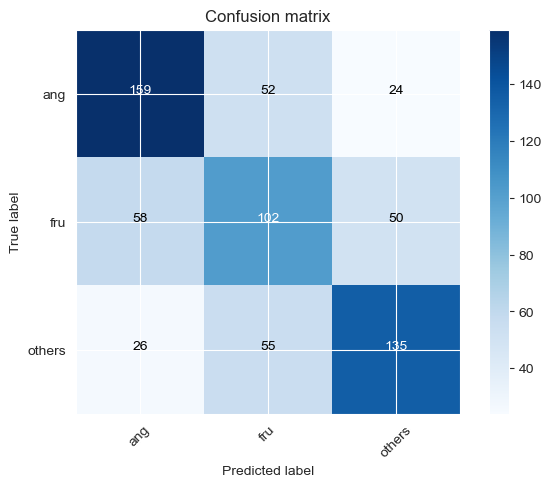

In [108]:
xgb_classifier = xgb.XGBClassifier(booster= 'gbtree', colsample_bytree= 0.3, learning_rate= 0.05, max_depth= 5, n_estimators= 300, subsample=0.8, n_jobs=4)
xgb_classifier.fit(combined_x_train, y_train)

# Predict
pred_probs = xgb_classifier.predict_proba(combined_x_test)

# Results
display_results(y_test, pred_probs)

with open('../data/model/pred_probas/combined_xgb_classifier.pkl', 'wb') as f:
    pickle.dump(pred_probs, f)

with open('../data/model/combined_XGB.pkl', 'wb') as f:
    pickle.dump(xgb_classifier, f)

In [85]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter grid for XGBoost
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'booster': ['gbtree', 'gblinear'],
    'colsample_bytree': [0.3, 0.7],
    'subsample': [0.5, 0.8]
}

# Initialize the classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softprob', num_class=len(emotion_dict), n_jobs=4)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# Fit the model
grid_search.fit(combined_x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_model = grid_search.best_estimator_

# Evaluate on the training set
train_predictions = best_model.predict(combined_x_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_classification_report = classification_report(y_train, train_predictions)
train_confusion_matrix = confusion_matrix(y_train, train_predictions)

print("Training set performance:")
print("Accuracy: ", train_accuracy)
print("Classification Report:\n", train_classification_report)
print("Confusion Matrix:\n", train_confusion_matrix)

# Evaluate on the test set
test_predictions = best_model.predict(combined_x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_classification_report = classification_report(y_test, test_predictions)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

print("Test set performance:")
print("Accuracy: ", test_accuracy)
print("Classification Report:\n", test_classification_report)
print("Confusion Matrix:\n", test_confusion_matrix)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


/Users/sensenc/anaconda3/envs/sound_detection_project/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [22:50:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sensenc/anaconda3/envs/sound_detection_project/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [22:50:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sensenc/anaconda3/envs/sound_detection_project/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [22:50:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sensenc/anaconda3/envs/sound_detection_project/lib/python3.10/site-packages/xgboo

Best parameters found:  {'booster': 'gbtree', 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Training set performance:
Accuracy:  0.9496593489780469
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       866
           1       0.93      0.96      0.94       891
           2       0.97      0.94      0.95       885

    accuracy                           0.95      2642
   macro avg       0.95      0.95      0.95      2642
weighted avg       0.95      0.95      0.95      2642

Confusion Matrix:
 [[817  37  12]
 [ 16 857  18]
 [ 20  30 835]]
Test set performance:
Accuracy:  0.5491679273827534
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.62      0.62       235
           1       0.42      0.46      0.44       210
           2       0.61      0.56      0.59       216

    accuracy                    

In [68]:
pd.DataFrame(x_train_text).columns.to_list()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

mfcc_3_std: 0.01828228123486042
rmse_std: 0.01787659153342247
sig_std: 0.016948752105236053
48: 0.013541792519390583
36: 0.012572814710438251
mfcc_2_mean: 0.012460816651582718
mfcc_4_std: 0.012272931635379791
45: 0.01192645076662302
mfcc_1_std: 0.011824013665318489
mfcc_5_std: 0.011278299614787102
44: 0.011145778931677341
86: 0.010936389677226543
23: 0.010491414926946163
88: 0.010487129911780357
mfcc_6_std: 0.010211003944277763
89: 0.010173404589295387
27: 0.010148420929908752
6: 0.01000905130058527
sig_mean: 0.009869932197034359
96: 0.009660457260906696
37: 0.009626736864447594
90: 0.0092898178845644
65: 0.009201237931847572
87: 0.008985187858343124
63: 0.008778594434261322
22: 0.008758499287068844
42: 0.008633309975266457
34: 0.008593487553298473
74: 0.008579743094742298
54: 0.008447582833468914
silence: 0.008326570503413677
mfcc_13_mean: 0.008151021786034107
13: 0.008094039745628834
0: 0.007962886244058609
20: 0.00795970018953085
71: 0.00795753113925457
1: 0.007923330180346966
18: 0

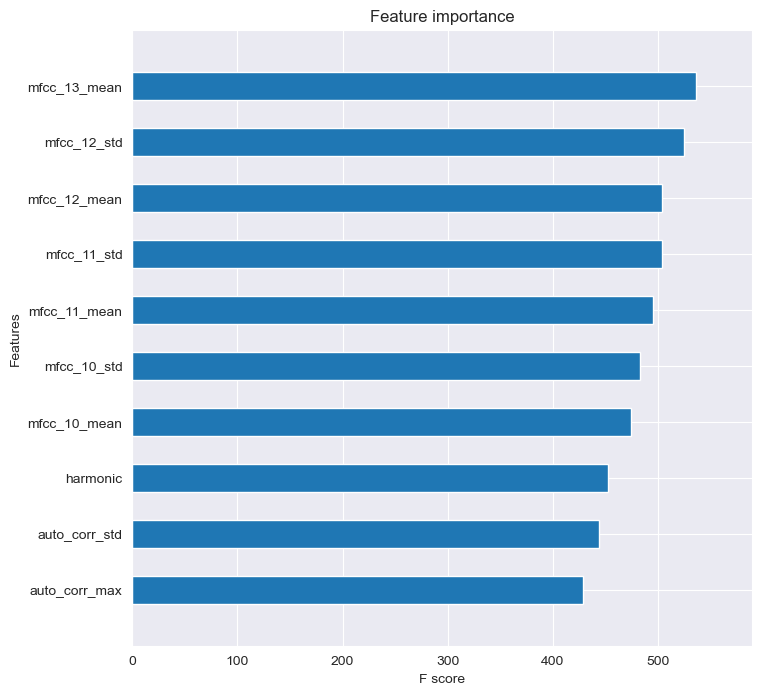

In [109]:
# Extract feature names from x_train_audio and x_train_text
audio_feature_names = x_train_audio.columns.difference(['wav_file', 'label']).tolist()
text_feature_names = pd.DataFrame(x_train_text).columns.to_list()


# Combine feature names
combined_feature_names = audio_feature_names + text_feature_names


# Plot feature importances
ax = xgb.plot_importance(xgb_classifier, max_num_features=10, height=0.5, show_values=False)
fig = ax.figure
fig.set_size_inches(8, 8)

# Add feature names to the plot
ax.set_yticklabels([combined_feature_names[i] for i in ax.get_yticks().astype(int)])

# Save the plot
plt.savefig('feature_importance.png')

# Print contribution scores with feature names
contribution_scores = xgb_classifier.feature_importances_
feature_importance_dict = {feature: score for feature, score in zip(combined_feature_names, contribution_scores)}

# Sort the feature importance dictionary by the importance scores
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Print sorted feature importances
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Test Set Accuracy =  0.649
Test Set F-score =  0.662
Test Set Precision =  0.664
Test Set Recall =  0.666
Confusion matrix, without normalization
[[125   7  64   7   5  16]
 [  8 190  36   8  11  47]
 [ 42  33 392  16  24  76]
 [  0   0  15 232   0   0]
 [  1   3  25  14 198   0]
 [ 20  48 135  14  12 136]]


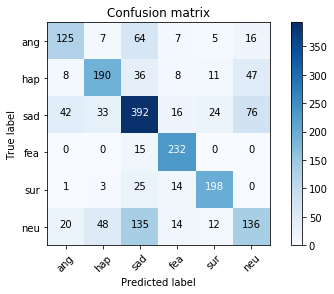

In [9]:
svc_classifier = LinearSVC()

svc_classifier.fit(combined_x_train, y_train)

# Predict
pred = svc_classifier.predict(combined_x_test)

# Results
one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict))
print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emo_keys)
(y_test, pred_probs)

with open('pred_probas/combined_svc_classifier_model.pkl', 'wb') as f:
    pickle.dump(svc_classifier, f)
    
with open('trained_models/combined/SVC.pkl', 'wb') as f:
    pickle.dump(svc_classifier, f)

Test Set Accuracy =  0.607
Test Set F-score =  0.608
Test Set Precision =  0.719
Test Set Recall =  0.574
Confusion matrix, without normalization
[[ 88  13 107   3   5   8]
 [  4 166  94   3   8  25]
 [ 18  20 509   3   9  24]
 [  0   0  70 177   0   0]
 [  0   8  74   0 159   0]
 [  4  30 224   9   7  91]]


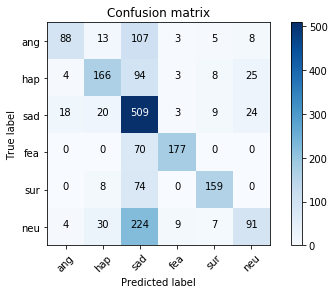

In [10]:
mnb_classifier = MultinomialNB()

mnb_classifier.fit(combined_x_train, y_train)

# Predict
pred_probs = mnb_classifier.predict_proba(combined_x_test)

# Results
display_results(y_test, pred_probs)

with open('pred_probas/combined_mnb_classifier.pkl', 'wb') as f:
    pickle.dump(pred_probs, f)
    
with open('trained_models/combined/MNB.pkl', 'wb') as f:
    pickle.dump(mnb_classifier, f)

Test Set Accuracy =  0.665
Test Set F-score =  0.681
Test Set Precision =  0.676
Test Set Recall =  0.690
Confusion matrix, without normalization
[[120  17  63   3   3  18]
 [ 13 182  35   6  12  52]
 [ 50  42 381   9  17  84]
 [  0   0   0 247   0   0]
 [  1   0  10   3 227   0]
 [ 22  57 126   5   8 147]]


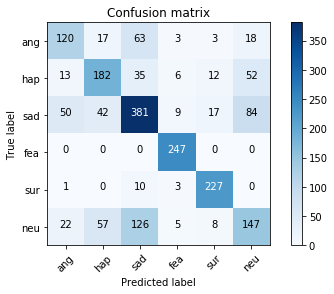

In [11]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(500, ), activation='relu', solver='adam', alpha=0.0001,
                               batch_size='auto', learning_rate='adaptive', learning_rate_init=0.01,
                               power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001,
                               verbose=False, warm_start=True, momentum=0.8, nesterovs_momentum=True,
                               early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                               epsilon=1e-08)

mlp_classifier.fit(combined_x_train, y_train)

# Predict
pred_probs = mlp_classifier.predict_proba(combined_x_test)

# Results
display_results(y_test, pred_probs)

with open('pred_probas/combined_mlp_classifier.pkl', 'wb') as f:
    pickle.dump(pred_probs, f)
    
with open('trained_models/combined/MLP.pkl', 'wb') as f:
    pickle.dump(mlp_classifier, f)

Test Set Accuracy =  0.631
Test Set F-score =  0.643
Test Set Precision =  0.686
Test Set Recall =  0.620
Confusion matrix, without normalization
[[119   8  77   1   5  14]
 [  9 175  59   4  14  39]
 [ 28  29 450   4  18  54]
 [ 10   0  53 184   0   0]
 [  5   7  49   2 173   5]
 [  7  34 166   9  13 136]]


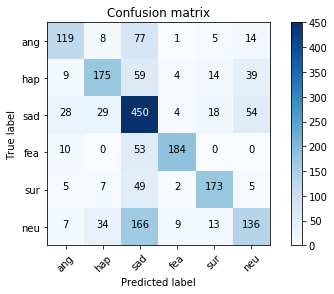

In [12]:
lr_classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

lr_classifier.fit(combined_x_train, y_train)

# Predict
pred_probs = lr_classifier.predict_proba(combined_x_test)

# Results
display_results(y_test, pred_probs)

with open('pred_probas/combined_lr_classifier.pkl', 'wb') as f:
    pickle.dump(pred_probs, f)
    
with open('trained_models/combined/LR.pkl', 'wb') as f:
    pickle.dump(lr_classifier, f)

[0.00794865 0.00733964 0.00552868 ... 0.         0.         0.        ]


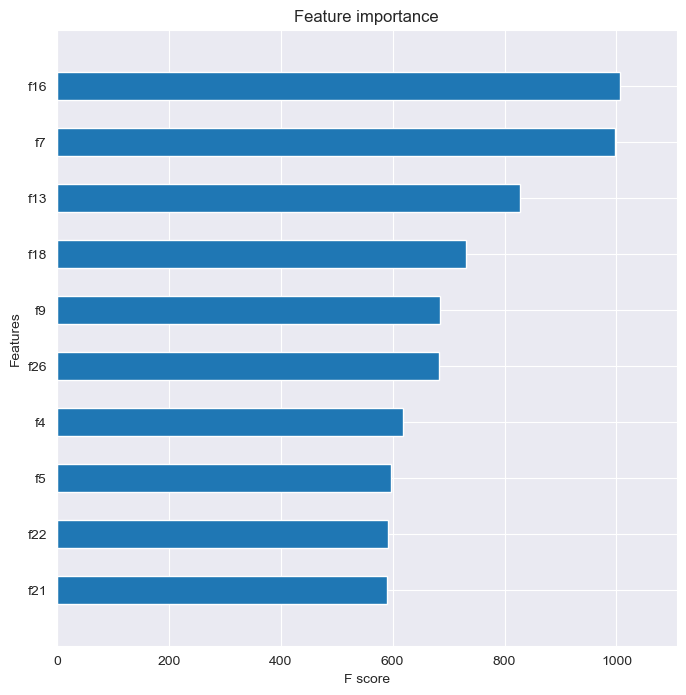

Test Set Accuracy =  0.707
Test Set F-score =  0.716
Test Set Precision =  0.735
Test Set Recall =  0.713
Confusion matrix, without normalization
[[117  11  81   1   3  11]
 [ 11 175  54   4   8  48]
 [ 30  28 470   2   7  46]
 [  0   0   0 247   0   0]
 [  0   0   3   0 238   0]
 [ 12  42 159   6   7 139]]


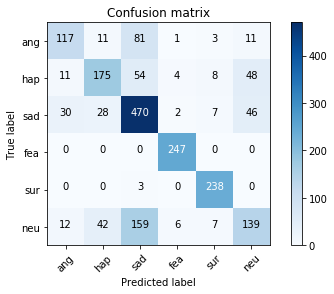

In [17]:
# Load predicted probabilities
with open('pred_probas/combined_rf_classifier.pkl', 'rb') as f:
    rf_pred_probs = pickle.load(f)

with open('pred_probas/combined_xgb_classifier.pkl', 'rb') as f:
    xgb_pred_probs = pickle.load(f)
    
with open('pred_probas/combined_svc_classifier_model.pkl', 'rb') as f:
    svc_preds = pickle.load(f)
    
with open('pred_probas/combined_mnb_classifier.pkl', 'rb') as f:
    mnb_pred_probs = pickle.load(f)
    
with open('pred_probas/combined_mlp_classifier.pkl', 'rb') as f:
    mlp_pred_probs = pickle.load(f)
    
with open('pred_probas/combined_lr_classifier.pkl', 'rb') as f:
    lr_pred_probs = pickle.load(f)

with open('pred_probas/combined_lstm_classifier.pkl', 'rb') as f:
    lstm_pred_probs = pickle.load(f)

# Average of the predicted probabilites
ensemble_pred_probs = (xgb_pred_probs +
                       mlp_pred_probs +
                       rf_pred_probs +
                       mnb_pred_probs +
                       lr_pred_probs)/5.0
# Show metrics
display_results(y_test, ensemble_pred_probs)